<a href="https://colab.research.google.com/github/HarshaV05/rand.stuff.imp/blob/B1/HarshaBashetty_18055897.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7COM1074 Applied Data Science and Analytics
# Coursework 1 - Visualisation

Provided is this jupyter notebook. Contained are all instructions necessary to complete the assignment.

This assignment is weighted with 20% of the total marks you can score in this module.


## Marking criteria
A total of 100 marks can be obtained.

20 marks will be awarded to a notebook that is valid and free of coding errors. That is, it should load without error on a university machine, and all cells can be run without any errors. *Hint:* Check via "Kernel" -> "Restart & Run All" in the menu bar. 

The remaining 80 marks will awarded for solving the 9 tasks, and distibuted as indicated.


## What to submit
You will have to submit 5 files:
1. This notebook, completed as instructed, in .ipynb file format;
2. This notebook, completed as instucted, in .html format;
3. 1 PCA scatter plot figure, PNG format;
4. 1 PCA components figure, PNG format;
5. 1 PCA scree plot figure, SVG format.

### Task 1 - Load the data (No marks)
Execute the provided code. It will load the data and create a data frame. 

Notice that it stores the `target` variable from the data set as `house_prices`. You will need that later.

In [0]:
import pandas as pd
import sklearn.datasets as data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

boston = data.load_boston()
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
house_prices = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Task 2 - Identify categorical features (4 marks)
The cell below prints the description of the data set. Read this description and identify the feature that is  categorical. In the text cell provided, specify the name of the categorical feature and justify why you decided it is categorical.

**Remark**: The 'MEDV' feature is mentioned in the attribute information but it is not present in the features. The reason is that the 'MEDV' feature is the target variable. 

In [0]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [0]:
print('The dataframe has {0} rows and {1} features'.format(boston_df.shape[0], boston_df.shape[1]))

The dataframe has 506 rows and 13 features


In [0]:
''' Summary of the data'''

boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [0]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [0]:
'''Number of unique values of each features'''

boston_df.agg(['count','nunique'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506,506,506,506,506,506,506,506,506,506,506,506,506
nunique,504,26,76,2,81,446,356,412,9,66,46,357,455


In [0]:
'''Value counts of the CHAS variable'''

boston_df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

**Answer task 2:** The feature **CHAS** is a categorical since it has two discrete values 1 and 0 only, based on the tract bounded by Charles river or not. The other 12 features are non-categorical/numerical type.

### Task 3 - remove categorical feature - (4 marks)
Use the `drop` function to remove the categorical feature from the DataFrame.

In [0]:
'''Removing the categorical feature'''

boston_df.drop(['CHAS'], inplace = True, axis = 1)

In [0]:
print('The new dataframe has {0} rows and {1} features'.format(boston_df.shape[0], boston_df.shape[1]))

The new dataframe has 506 rows and 12 features


### Task 4 - Scaling the data (6 marks)
Scale the features to zero mean and unit variance using `sklearn.preprocessing.StandardScaler`.

In [0]:
'''Normalising the data to zero mean and unit variance'''

from sklearn.preprocessing import StandardScaler 
ss = StandardScaler() #instantiate the StandardScaler function
ss.fit(boston_df)
boston_norm = ss.transform(boston_df)

In [0]:
'''checking the mean of new data'''

boston_norm.mean(axis = 0)

array([ 6.34099712e-17, -6.34319123e-16, -2.68291099e-15,  2.49032240e-15,
       -1.14523016e-14, -1.40785495e-15,  9.21090169e-16,  5.44140929e-16,
       -8.86861950e-16, -9.20563581e-15,  8.16310129e-15, -3.37016317e-16])

In [0]:
'''Checking the variance of new data'''

boston_norm.var(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Task 5 - Principal component analysis (PCA) (6 marks)
Perform a PCA of the scaled data set using `sklearn.decomposition.PCA`. 

In [0]:
'''Transforming the data using PCA decomposition'''

from sklearn.decomposition import PCA
pca = PCA() #instantiating the PCA function
pca.fit(boston_norm)
boston_pca = pca.transform(boston_norm)

### Task 6 - Scatter plot (24 marks)
**6.1.** Make a scatter plot of the first 2 principal components in a figure. The figure should be 6 inches wide, 4.5 inches tall (4 marks). 

**6.2** Set appropriate labels for the x- and y-axis (4 marks).

**6.3** Use the `house_prices` variable to color the scatter plot dots by house price. Choose a suitable color map. Add a colorbar() to the figure. Set the label of the colorbar according to the variable it maps (4 marks).

**6.4** Justify your choice of colormap in the provided text cell (1-2 sentences, 4 marks).

**6.5** Save scatter plot as PNG with 150 dpi (4 marks).

**6.6** Verify that the saved file has the correct size (6 x 4.5 inches) and upload it as part of your submission (4 marks).

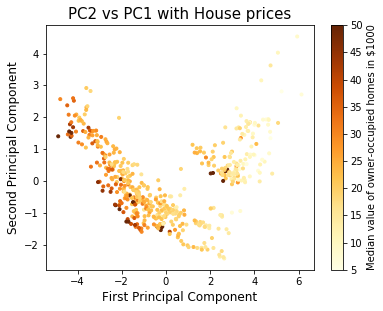

In [0]:
'''Scatter plot of first two principal components'''

PC1 = boston_pca[:,0] #First Principal Component
PC2 = boston_pca[:,1] #Second Principal Component

f = plt.figure(figsize=(6,4.5)) #setting figure size
ax = f.gca() 
dots = ax.scatter(PC1,PC2, c = house_prices, cmap = 'YlOrBr', marker = '.')
plt.colorbar(dots, label = 'Median value of owner-occupied homes in $1000')
ax.set_xlabel('First Principal Component' , size = 12)
ax.set_ylabel('Second Principal Component', size = 12)
ax.set_title('PC2 vs PC1 with House prices', size = 15)

plt.savefig("U://image01.png", dpi = 150) #saving the figure

**Answer to 6.4**: The sequential color map 'YlOrbr' is used here to distinguish the sequential values of house prices. The colors yellow, orange and brown represents the increasing values of prices repectively with yellow mapping the lower values, brown mapping the higher values and orange mapping the values between them. 

### Task 7 - PCA components (24 marks)
**7.1** Plot PCA components matrix as image, size 7 inches wide, 5 inches tall (4 marks). 

**7.2** Choose a suitable colormap, add a colorbar to the figure, add a suitable label to the colorbar (4 marks).

**7.3** Justify your choice of colormap in the provided text cell (1-2 sentences, 4 marks).

**7.4** Use the dataset's feature names as x-tick-labels, rotated by 90 degrees (4 marks).

**7.5** Save as PNG with 75 dpi (4 marks).

**7.6** Verify that the saved file has the correct size (7 x 5 inches) and upload it as part of your submission (4 marks).

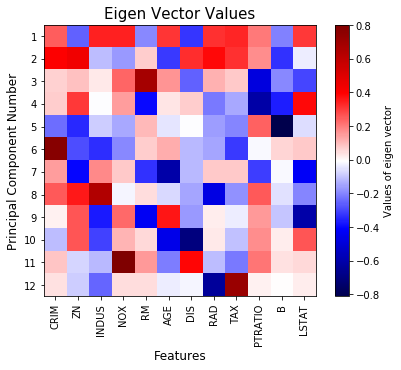

In [0]:
'''Values of eigen vectors in the form of image'''

components = pca.components_ #eigen vectors
yticklabels = [1,2,3,4,5,6,7,8,9,10,11,12] #principal component numbers

f = plt.figure(figsize = (7,5)) #setting the figure size
ax = f.gca()
img = ax.imshow(components, cmap = 'seismic')
ax.set_ylabel('Principal Component Number', size = 12)
ax.set_xlabel('Features', size =12)
ax.set_xticks(range(0,12))
ax.set_yticks(range(0,12))
ax.set_xticklabels(boston_df.columns, rotation = 90)
ax.set_yticklabels(yticklabels)
ax.set_title('Eigen Vector Values', size = 15)
plt.colorbar(img, label = 'Values of eigen vector')

plt.savefig('U://image02.png', dpi=75) #saving the figure

**Answer to 7.3:** The diverging colormap 'seismic' is used to distinguish values of the eigen vector, which are around the zero. The colors blue, white and red represents different range of values with red mapping the positive values, blue mapping the negative values and white/lighter-shades mapping the values between them.    

### Task 8 - Scree plot (12 marks)
**8.1** Make scree plot with grey dashed lines and black round markers, 5 inches wide, 4 inches tall. Label the axes appropriately. (4 marks).

**8.2** Save scree plot as svg (4 marks).

**8.3** Verify that the saved file has the correct size (5x4 inches) and upload it as part of your submission (4 marks).

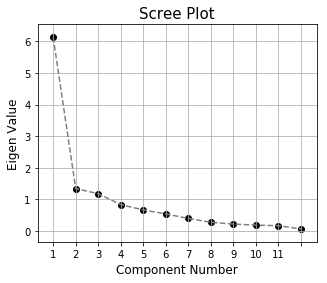

In [0]:
'''Scree plot'''

f = plt.figure(figsize = (5,4))
ax = f.gca()
ax.plot(pca.explained_variance_, linestyle='--', color = 'grey')
ax.scatter(range(0,12), pca.explained_variance_, marker='o', color = 'black')
ax.set_title('Scree Plot', size = 15)
ax.set_xlabel('Component Number', size = 12)
ax.set_ylabel('Eigen Value', size =12)
ax.set_xticks(range(0,12))
ax.set_xticklabels(range(1,12))
plt.grid()

plt.savefig('U://image03.svg') #saving the figure